# Taller 1 Herramientas Computacionales (IMEC3602)

## Juan Daniel Torres Amézquita (201414896)

In [224]:
#Se importan los recursos importantes para manejar cálculos y DataFrames.
import os
import pandas as pd
import scipy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [225]:
#A continuación, cargamos los datos de cada ciudad en arreglos distintos (para facilitar el análisis).
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Barranquilla'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_obj_barranquilla = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Barranquilla'
fuente = 'NREL'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_ref_barranquilla = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

In [226]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Cali'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_obj_cali = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Cali'
fuente = 'NREL'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_ref_cali = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

In [227]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Carmendebolivar'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_obj_carmendebolivar = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Carmendebolivar'
fuente = 'NREL'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_ref_carmendebolivar = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

In [228]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Medellin'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_obj_medellin = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Medellin'
fuente = 'NREL'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_ref_medellin = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

In [229]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'SantaMarta'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_obj_santamarta = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'SantaMarta'
fuente = 'NREL'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_ref_santamarta = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

In [230]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Sucre'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_obj_sucre = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Sucre'
fuente = 'NREL'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_ref_sucre = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

In [231]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Uribia'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_obj_uribia = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Uribia'
fuente = 'NREL'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_ref_uribia = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

In [232]:
base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Valledupar'
fuente = 'IDEAM'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_obj_valledupar = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

base_dir = os.path.join( '.','data')
output_dir = os.path.join( '.','output')
ciudad = 'Valledupar'
fuente = 'NREL'
serie_csv = os.path.join(base_dir,ciudad,fuente+'.csv')
serie_ref_valledupar = pd.read_csv(serie_csv, sep = ';',
                encoding='latin-1')

### Punto 1

Función que calcula el ENFICC según la metodología dada en el ejemplo. Primero se hace un arreglo con la información dada por la serie input, y luego se hacen los cálculos de promedio diario y mensual. Finalmente, se obtiene el cuantil para el cual el 99% del tiempo se superará la energía dada por el valor resultado de la función.

In [233]:
def enficc (serie_horaria): 
    agnos = sorted(serie_horaria['AÑO'].unique()) 
    ghi_df_mensual = pd.DataFrame(columns=['AÑO', 'MES', 'DIAS', 'PromedioMes']) 
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]['DIA'].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria['AÑO'] == agno)
                            & (serie_horaria['MES'] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {'AÑO':agno, 'MES':mes, 'DIAS':dias[-1],
                        'PromedioMes':ghi_mes}
            ghi_df_mensual = ghi_df_mensual.append(ghi_dict, ignore_index=True)
            
    ghi_df_diaria = pd.DataFrame(columns=['AÑO', 'MES', 'PromedioDia'])
    for agno in agnos:
        for mes in range(1,13):
            dias = ghi_df_mensual.loc[((ghi_df_mensual['AÑO'] == agno)
                            & (ghi_df_mensual['MES'] == mes))
                                         ,'DIAS'].item()
            ghi_diario = ghi_df_mensual.loc[(
                (ghi_df_mensual['AÑO'] == agno)
                            & (ghi_df_mensual['MES'] == mes)),
                'PromedioMes'].item()/dias
            ghi_dict = {'AÑO':agno, 'MES':mes, 'PromedioDia':ghi_diario}
            ghi_df_diaria = ghi_df_diaria.append(ghi_dict, ignore_index=True)
            
    
    ghi_diario_loc = ghi_df_diaria
    percentil = 0.01
    enficc_value = ghi_diario_loc.quantile(q=percentil, 
                                 numeric_only=True)['PromedioDia']
    print('La ENFICC 99% es: ', enficc_value)
    return enficc_value

### Punto 2

Se comparan dos series horarias distintas. Es importante notar que las series deben pertenecer a la misma ciudad. El resultado, es una gráfica comparativa. Primero, se hacen los promedios diarios y mensuales de cada serie, se guardan en un DataFrame y finalmente se grafican.

In [234]:
def graph_compare (serie_target, serie_sat):
    
    agnos = sorted(serie_target['AÑO'].unique())
    ghi_df_mensual1 = pd.DataFrame(columns=['AÑO', 'MES', 'DIAS', 'PromedioMes'])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_target)[-1]
            dias = sorted(serie_target[(serie_target['AÑO'] == agno) &
                        (serie_target['MES'] == mes)]['DIA'].unique())
            ghi_mes1 = serie_target.loc[((serie_target['AÑO'] == agno)
                            & (serie_target['MES'] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict1 = {'AÑO':agno, 'MES':mes, 'DIAS':dias[-1],
                        'PromedioMes':ghi_mes1}
            ghi_df_mensual1 = ghi_df_mensual1.append(ghi_dict1, ignore_index=True)
            
    ghi_df_diaria1 = pd.DataFrame(columns=['AÑO', 'MES', 'PromedioDia'])
    for agno in agnos:
        for mes in range(1,13):
            dias = ghi_df_mensual1.loc[((ghi_df_mensual1['AÑO'] == agno)
                            & (ghi_df_mensual1['MES'] == mes))
                                         ,'DIAS'].item()
            ghi_diario1 = ghi_df_mensual1.loc[(
                (ghi_df_mensual1['AÑO'] == agno)
                            & (ghi_df_mensual1['MES'] == mes)),
                'PromedioMes'].item()/dias
            ghi_dict1 = {'AÑO':agno, 'MES':mes, 'PromedioDia':ghi_diario1}
            ghi_df_diaria1 = ghi_df_diaria1.append(ghi_dict1, ignore_index=True)
            
            ghi_diario_loc1 = ghi_df_diaria1
            datos_serie1 = sorted(ghi_diario_loc1["PromedioDia"])
            
            
    ghi_df_mensual2 = pd.DataFrame(columns=['AÑO', 'MES', 'DIAS', 'PromedioMes'])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_sat)[-1]
            dias = sorted(serie_sat[(serie_sat['AÑO'] == agno) &
                        (serie_sat['MES'] == mes)]['DIA'].unique())
            ghi_mes2 = serie_sat.loc[((serie_sat['AÑO'] == agno)
                            & (serie_sat['MES'] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict2 = {'AÑO':agno, 'MES':mes, 'DIAS':dias[-1],
                        'PromedioMes':ghi_mes2}
            ghi_df_mensual2 = ghi_df_mensual2.append(ghi_dict2, ignore_index=True)
            
    ghi_df_diaria2 = pd.DataFrame(columns=['AÑO', 'MES', 'PromedioDia'])
    for agno in agnos:
        for mes in range(1,13):
            dias = ghi_df_mensual2.loc[((ghi_df_mensual2['AÑO'] == agno)
                            & (ghi_df_mensual2['MES'] == mes))
                                         ,'DIAS'].item()
            ghi_diario = ghi_df_mensual2.loc[(
                (ghi_df_mensual2['AÑO'] == agno)
                            & (ghi_df_mensual2['MES'] == mes)),
                'PromedioMes'].item()/dias
            ghi_dict2 = {'AÑO':agno, 'MES':mes, 'PromedioDia':ghi_diario}
            ghi_df_diaria2 = ghi_df_diaria2.append(ghi_dict2, ignore_index=True)
            
            ghi_diario_loc2 = ghi_df_diaria2
            datos_serie2 = sorted(ghi_diario_loc2["PromedioDia"])
            
    numdatos = range(len(datos_serie1))
    pylab.xlabel("Datos")
    pylab.ylabel("Energía/Energía Base IDEAM")
    pylab.plot(numdatos,datos_serie1,'-b', label='IDEAM')
    pylab.plot(numdatos,datos_serie2,'-r', label='NREL')
    pylab.legend(loc='upper left')
    figure = pylab.savefig(os.path.join(output_dir,'comparacion.png'), dpi=600)
    return figure

### Punto 3

Ajusta la serie satelital dado un intervalo de 3 meses de serie IDEAM según la metodología MCP. Es importante notar que los argumentos de tiempo tienen que corresponder a la función (es decir, que el tiempo introducido exista en los datos de la serie IDEAM), y las ciudades deben de coincidir. El resultado es un DataFrame con el mismo formato pero con los datos de la serie ajustada.
Primero, se corta la serie "target" (IDEAM), y luego se cortan los datos correspondientes a ese tiempo en la serie satelital, con el fin de calcular las variables (medias y desviaciones estándar) que compondrán la función de ajuste. Posteriormente, se toman los datos producto de esta función y se introducen a un nuevo DataFrame.

In [235]:
def ajuste_MCP_3meses(serie_target, serie_sat, agno, mes):
    lista1_target = serie_target[(serie_target['AÑO'] == agno) & (serie_target['MES'] == mes)]
    lista2_target = serie_target[(serie_target['AÑO'] == agno) & (serie_target['MES'] == mes+1)]                 
    lista3_target = serie_target[(serie_target['AÑO'] == agno) & (serie_target['MES'] == mes+2)]
    listas_target = [lista1_target, lista2_target, lista3_target]      
    serie_ideam_k = pd.concat(listas_target)
    
    lista1_sat = serie_sat[(serie_sat['AÑO'] == agno) & (serie_sat['MES'] == mes)]
    lista2_sat = serie_sat[(serie_sat['AÑO'] == agno) & (serie_sat['MES'] == mes+1)]
    lista3_sat = serie_sat[(serie_sat['AÑO'] == agno) & (serie_sat['MES'] == mes+2)]
    listas_sat = [lista1_sat, lista2_sat, lista3_sat]
    serie_sat_k = pd.concat(listas_sat)
    
    serie_ajuste = serie_sat.copy(deep=True)
    muY = serie_ideam_k['IDEAM'].mean()
    muX = serie_sat_k['NREL'].mean()
    sigmaY = serie_ideam_k['IDEAM'].std(ddof=0)
    sigmaX = serie_sat_k['NREL'].std(ddof=0)
    
    dat_serie_ajuste = (muY-((sigmaY/sigmaX)*muX))+(((sigmaY/sigmaX))*(serie_sat['NREL']))
    
    for n in range(1, len(serie_ajuste)):
        if dat_serie_ajuste[n] < 0:
            dat_serie_ajuste[n] = 0
        
    serie_ajuste['NREL'] = dat_serie_ajuste
    serie_ajuste = serie_ajuste.rename(columns={'NREL':'AJUSTE'})        
    return serie_ajuste

Ajusta la serie satelital dado un intervalo de 6 meses de serie IDEAM según la metodología MCP.

In [236]:
def ajuste_MCP_6meses(serie_target, serie_sat, agno, mes):
    lista1_target = serie_target[(serie_target['AÑO'] == agno) & (serie_target['MES'] == mes)]
    lista2_target = serie_target[(serie_target['AÑO'] == agno) & (serie_target['MES'] == mes+1)]                 
    lista3_target = serie_target[(serie_target['AÑO'] == agno) & (serie_target['MES'] == mes+2)]
    lista4_target = serie_target[(serie_target['AÑO'] == agno) & (serie_target['MES'] == mes+3)]
    lista5_target = serie_target[(serie_target['AÑO'] == agno) & (serie_target['MES'] == mes+4)]                 
    lista6_target = serie_target[(serie_target['AÑO'] == agno) & (serie_target['MES'] == mes+5)]
    listas_target = [lista1_target, lista2_target, lista3_target, lista4_target, lista5_target, lista6_target]      
    serie_ideam_k = pd.concat(listas_target)
    
    lista1_sat = serie_sat[(serie_sat['AÑO'] == agno) & (serie_sat['MES'] == mes)]
    lista2_sat = serie_sat[(serie_sat['AÑO'] == agno) & (serie_sat['MES'] == mes+1)]                 
    lista3_sat = serie_sat[(serie_sat['AÑO'] == agno) & (serie_sat['MES'] == mes+2)]
    lista4_sat = serie_sat[(serie_sat['AÑO'] == agno) & (serie_sat['MES'] == mes+3)]
    lista5_sat = serie_sat[(serie_sat['AÑO'] == agno) & (serie_sat['MES'] == mes+4)]                 
    lista6_sat = serie_sat[(serie_sat['AÑO'] == agno) & (serie_sat['MES'] == mes+5)]
    listas_sat = [lista1_sat, lista2_sat, lista3_sat, lista4_sat, lista5_sat, lista6_sat]    
    serie_sat_k = pd.concat(listas_sat)
    
    serie_ajuste = serie_sat.copy(deep=True)
    muY = serie_ideam_k['IDEAM'].mean()
    muX = serie_sat_k['NREL'].mean()
    sigmaY = serie_ideam_k['IDEAM'].std(ddof=0)
    sigmaX = serie_sat_k['NREL'].std(ddof=0)
    
    dat_serie_ajuste = (muY-((sigmaY/sigmaX)*muX))+(((sigmaY/sigmaX))*(serie_sat['NREL']))
    
    for n in range(1, len(serie_ajuste)):
        if dat_serie_ajuste[n] < 0:
            dat_serie_ajuste[n] = 0
        
    serie_ajuste['NREL'] = dat_serie_ajuste
    serie_ajuste = serie_ajuste.rename(columns={'NREL':'AJUSTE'})        
    return serie_ajuste

Ajusta la serie satelital dado un intervalo de un año de serie IDEAM según la metodología MCP.

In [237]:
def ajuste_MCP_agno(serie_target, serie_sat, agno):
    
    lista_target = serie_target[(serie_target['AÑO'] == agno)]
    listas_target = [lista_target]      
    serie_ideam_k = pd.concat(listas_target)
    
    lista_sat = serie_sat[(serie_sat['AÑO'] == agno)]
    listas_sat = [lista_sat]    
    serie_sat_k = pd.concat(listas_sat)
    
    serie_ajuste = serie_sat.copy(deep=True)
    muY = serie_ideam_k['IDEAM'].mean()
    muX = serie_sat_k['NREL'].mean()
    sigmaY = serie_ideam_k['IDEAM'].std(ddof=0)
    sigmaX = serie_sat_k['NREL'].std(ddof=0)
    
    dat_serie_ajuste = (muY-((sigmaY/sigmaX)*muX))+(((sigmaY/sigmaX))*(serie_sat['NREL']))
    
    for n in range(1, len(serie_ajuste)):
        if dat_serie_ajuste[n] < 0:
            dat_serie_ajuste[n] = 0
        
    serie_ajuste['NREL'] = dat_serie_ajuste
    serie_ajuste = serie_ajuste.rename(columns={'NREL':'AJUSTE'})        
    return serie_ajuste

A continuación se tienen unas funciones que ayudan a graficar las series para comprobar visualmente la efectividad del ajuste.

In [238]:
def ghi_mensual(serie_res, serie_horaria):
    agnos = sorted(serie_res['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=['AÑO', 'MES', 'DIAS', 'PromedioMes'])
    for agno in agnos:
        for mes in range(1,13):
            nombre_energia = list(serie_horaria)[-1]
            dias = sorted(serie_horaria[(serie_horaria['AÑO'] == agno) &
                        (serie_horaria['MES'] == mes)]['DIA'].unique())
            ghi_mes = serie_horaria.loc[((serie_horaria['AÑO'] == agno)
                            & (serie_horaria['MES'] == mes)),
                                        nombre_energia].sum()/1000
            ghi_dict = {'AÑO':agno, 'MES':mes, 'DIAS':dias[-1],
                        'PromedioMes':ghi_mes}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

def ghi_dia(serie_ghi_mensual):
    agnos = sorted(serie_ghi_mensual['AÑO'].unique())
    ghi_df = pd.DataFrame(columns=['AÑO', 'MES', 'PromedioDia'])
    for agno in agnos:
        for mes in range(1,13):
            dias = serie_ghi_mensual.loc[((serie_ghi_mensual['AÑO'] == agno)
                            & (serie_ghi_mensual['MES'] == mes))
                                         ,'DIAS'].item()
            ghi_diario = serie_ghi_mensual.loc[(
                (serie_ghi_mensual['AÑO'] == agno)
                            & (serie_ghi_mensual['MES'] == mes)),
                'PromedioMes'].item()/dias
            ghi_dict = {'AÑO':agno, 'MES':mes, 'PromedioDia':ghi_diario}
            ghi_df = ghi_df.append(ghi_dict, ignore_index=True)
    return ghi_df

### Punto 4

A continuación se calcula el error RMS según la metodología entregada en el documento.

In [305]:
def calc_RMSEn (serie_obs,serie_mod):
    agno = sorted(serie_obs['AÑO'].unique())
    obs = serie_obs[(serie_obs['AÑO'] >= agno[0])]
    mod = serie_mod[(serie_mod['AÑO'] >= agno[0])]
    num_1 = obs.iloc[:,-1].values
    num_2 = mod.iloc[:,-1].values
    maximo_obs = np.max(num_1) 
    minimo_obs = np.min(num_1)       
    calc = (np.sqrt (((num_1 - num_2)**2).mean()))/ (maximo_obs-minimo_obs) 
    return calc

A continuación se calcula el error MBE según la metodología entregada en el documento.

In [306]:
def calc_MBE (serie_obs,serie_mod):
    agno = sorted(serie_obs['AÑO'].unique())
    obs = serie_obs[(serie_obs['AÑO'] >= agno[0])]
    mod = serie_mod[(serie_mod['AÑO'] >= agno[0])]
    num_1 = obs.iloc[:,-1].values
    num_2 = mod.iloc[:,-1].values
    resta = num_2-num_1
    num = resta.sum()
    den = num_1.sum()
    calc = abs(num/den)
    return calc

In [307]:
from scipy import stats

A continuación se calcula el error según la metodología Kolmogorov-Smirnov.

In [308]:
def calc_KSI (serie_obs,serie_mod):
    agno = sorted(serie_obs['AÑO'].unique())
    obs = serie_obs[(serie_obs['AÑO'] >= agno[0])]
    mod = serie_mod[(serie_mod['AÑO'] >= agno[0])]
    num_1 = obs.iloc[:,-1].values
    num_2 = mod.iloc[:,-1].values
    calc = scipy.stats.mstats.ks_2samp(num_1,num_2)
    return calc

### Punto 5

#### Barranquilla

In [309]:
enficc(serie_obj_barranquilla) #Se obtiene la ENFICC según la serie IDEAM.

La ENFICC 99% es:  4.16059025817


4.1605902581736194

In [310]:
enficc(serie_ref_barranquilla) #Se obtiene la ENFICC según la serie NREL.

La ENFICC 99% es:  4.60594683333


4.6059468333333333

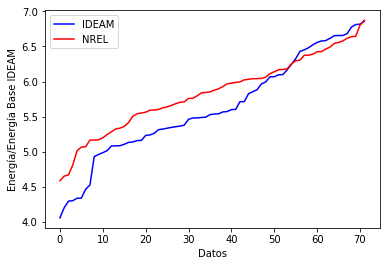

In [311]:
graph_compare(serie_obj_barranquilla,serie_ref_barranquilla) #Gráfica comparativa de serie IDEAM vs NREL.

In [312]:
#Se crean las series ajustadas dependiendo de su temporalidad.
barranquilla_ajust_3meses = ajuste_MCP_3meses(serie_obj_barranquilla, serie_ref_barranquilla, 2010, 1)
barranquilla_ajust_6meses = ajuste_MCP_6meses(serie_obj_barranquilla, serie_ref_barranquilla, 2010, 1)
barranquilla_ajust_agno = ajuste_MCP_agno(serie_obj_barranquilla, serie_ref_barranquilla, 2010)

In [313]:
enficc(barranquilla_ajust_3meses) #Se obtiene la ENFICC según el ajuste de resolución de 3 meses.

La ENFICC 99% es:  4.30591037173


4.3059103717250151

In [314]:
enficc(barranquilla_ajust_6meses) #Se obtiene la ENFICC según el ajuste de resolución de 6 meses.

La ENFICC 99% es:  4.35765953143


4.3576595314323328

In [315]:
enficc(barranquilla_ajust_agno) #Se obtiene la ENFICC según el ajuste de resolución de un año.

La ENFICC 99% es:  4.55877095112


4.5587709511229724

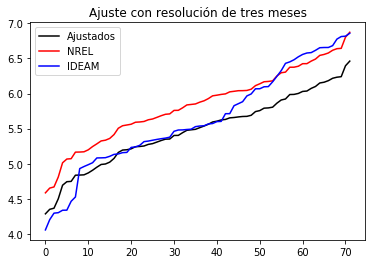

In [316]:
#Se grafica el ajuste con resolución de 3 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_barranquilla, barranquilla_ajust_3meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_barranquilla, serie_ref_barranquilla)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_barranquilla, serie_obj_barranquilla)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de tres meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')

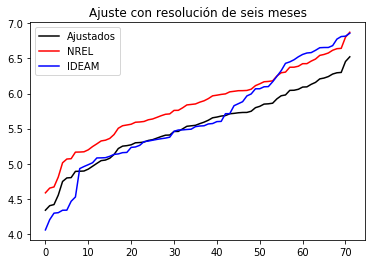

In [317]:
#Se grafica el ajuste con resolución de 6 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_barranquilla, barranquilla_ajust_6meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_barranquilla, serie_ref_barranquilla)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_barranquilla, serie_obj_barranquilla)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de seis meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')

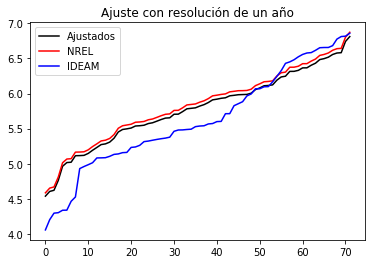

In [318]:
#Se grafica el ajuste con resolución de un año.
ghi_mensual_ajust = ghi_mensual(serie_obj_barranquilla, barranquilla_ajust_agno)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_barranquilla, serie_ref_barranquilla)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_barranquilla, serie_obj_barranquilla)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de un año')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')

Calculamos los errores RMS de la serie referencia y cada serie ajustada:

In [319]:
calc_RMSEn(serie_obj_barranquilla,serie_ref_barranquilla) #Error RMS con respecto a la serie NREL.

0.1067605497750234

In [320]:
calc_RMSEn(serie_obj_barranquilla,barranquilla_ajust_3meses) #Error RMS con respecto al ajuste con resolución de 3 meses.

0.10452433058446431

In [321]:
calc_RMSEn(serie_obj_barranquilla,barranquilla_ajust_6meses) #Error RMS con respecto al ajuste con resolución de 6 meses.

0.10456920220297609

In [322]:
calc_RMSEn(serie_obj_barranquilla,barranquilla_ajust_agno) #Error RMS con respecto al ajuste con resolución de un año.

0.10628148225660763

Calculamos los errores MBE de la serie referencia y cada serie ajustada:

In [323]:
calc_MBE(serie_obj_barranquilla,serie_ref_barranquilla) #Error MBE con respecto a la serie NREL.

0.036987540425613495

In [324]:
calc_MBE(serie_obj_barranquilla,barranquilla_ajust_3meses) #Error MBE con respecto al ajuste con resolución de 3 meses.

0.027179849064142288

In [325]:
calc_MBE(serie_obj_barranquilla,barranquilla_ajust_6meses) #Error MBE con respecto al ajuste con resolución de 6 meses.

0.017048462196718114

In [326]:
calc_MBE(serie_obj_barranquilla,barranquilla_ajust_agno) #Error MBE con respecto al ajuste con resolución de un año.

0.027154521781421054

Calculamos los errores KSI de la serie referencia y cada serie ajustada:

In [327]:
calc_KSI(serie_obj_barranquilla,serie_ref_barranquilla) #Error KSI con respecto a la serie NREL.

(0.026738171306861569, 9.4236727770893542e-17)

In [328]:
calc_KSI(serie_obj_barranquilla,barranquilla_ajust_3meses) #Error KSI con respecto al ajuste con resolución de 3 meses.

(0.03337517115472443, 7.2931403030674249e-26)

In [329]:
calc_KSI(serie_obj_barranquilla,barranquilla_ajust_6meses) #Error KSI con respecto al ajuste con resolución de 6 meses.

(0.03067472995588055, 6.499204648157872e-22)

In [330]:
calc_KSI(serie_obj_barranquilla,barranquilla_ajust_agno) #Error KSI con respecto al ajuste con resolución de un año.

(0.024322987981134997, 6.1733204561125581e-14)

#### Cali

In [331]:
enficc(serie_obj_cali) #Se obtiene la ENFICC según la serie IDEAM.

La ENFICC 99% es:  3.33077931605


3.3307793160475607

In [332]:
enficc(serie_ref_cali) #Se obtiene la ENFICC según la serie NREL.

La ENFICC 99% es:  4.36085916667


4.3608591666666667

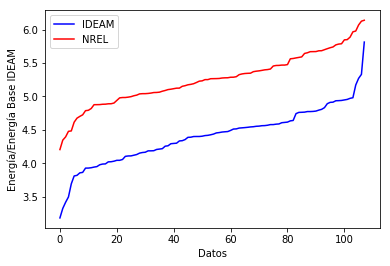

In [333]:
graph_compare(serie_obj_cali,serie_ref_cali) #Gráfica comparativa de serie IDEAM vs NREL.

In [334]:
#Se crean las series ajustadas dependiendo de su temporalidad.
cali_ajust_3meses = ajuste_MCP_3meses(serie_obj_cali, serie_ref_cali, 2010, 1)
cali_ajust_6meses = ajuste_MCP_6meses(serie_obj_cali, serie_ref_cali, 2010, 1)
cali_ajust_agno = ajuste_MCP_agno(serie_obj_cali, serie_ref_cali, 2010)

In [335]:
enficc(cali_ajust_3meses) #Se obtiene la ENFICC según el ajuste de resolución de 3 meses. 

La ENFICC 99% es:  3.6492280594


3.649228059397883

In [336]:
enficc(cali_ajust_6meses) #Se obtiene la ENFICC según el ajuste de resolución de 6 meses.

La ENFICC 99% es:  3.65839627779


3.658396277788694

In [337]:
enficc(cali_ajust_agno) #Se obtiene la ENFICC según el ajuste de resolución de un año.

La ENFICC 99% es:  3.65264295714


3.652642957143585

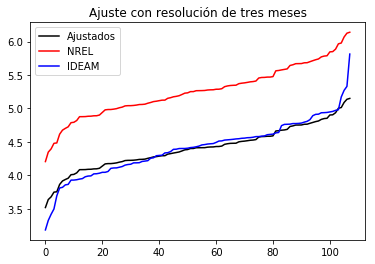

In [338]:
#Se grafica el ajuste con resolución de 3 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_cali, cali_ajust_3meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_cali, serie_ref_cali)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_cali, serie_obj_cali)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de tres meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')

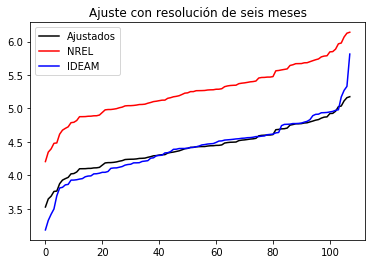

In [339]:
#Se grafica el ajuste con resolución de 6 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_cali, cali_ajust_6meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_cali, serie_ref_cali)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_cali, serie_obj_cali)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de seis meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')


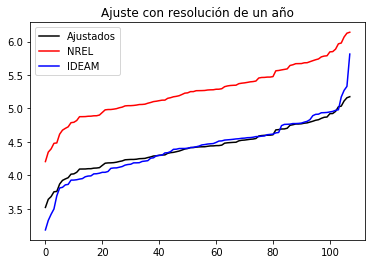

In [340]:
#Se grafica el ajuste con resolución de un año.
ghi_mensual_ajust = ghi_mensual(serie_obj_cali, cali_ajust_agno)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_cali, serie_ref_cali)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_cali, serie_obj_cali)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de un año')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')

In [341]:
calc_RMSEn(serie_obj_cali,serie_ref_cali) #Error RMS con respecto a la serie NREL.

0.11968840295680064

In [342]:
calc_RMSEn(serie_obj_cali,cali_ajust_3meses) #Error RMS con respecto al ajuste con resolución de 3 meses.

0.10101577646679549

In [343]:
calc_RMSEn(serie_obj_cali,cali_ajust_6meses) #Error RMS con respecto al ajuste con resolución de 6 meses.

0.10136240817437119

In [344]:
calc_RMSEn(serie_obj_cali,cali_ajust_agno) #Error RMS con respecto al ajuste con resolución de un año.

0.10146180900923341

In [345]:
calc_MBE(serie_obj_cali,serie_ref_cali) #Error MBE con respecto a la serie NREL.

0.1925535745682122

In [346]:
calc_MBE(serie_obj_cali,cali_ajust_3meses) #Error MBE con respecto al ajuste con resolución de 3 meses.

0.00073192936870588958

In [347]:
calc_MBE(serie_obj_cali,cali_ajust_6meses) #Error MBE con respecto al ajuste con resolución de 6 meses.

0.0030922447934169759

In [348]:
calc_MBE(serie_obj_cali,cali_ajust_agno) #Error MBE con respecto al ajuste con resolución de un año.

0.0023223781077575355

In [349]:
calc_KSI(serie_obj_cali,serie_ref_cali) #Error KSI con respecto a la serie NREL.

(0.047447013487477277, 1.4888855059112622e-77)

In [350]:
calc_KSI(serie_obj_cali,cali_ajust_3meses) #Error KSI con respecto al ajuste con resolución de 3 meses.

(0.031538383531082861, 1.6712003104439445e-34)

In [351]:
calc_KSI(serie_obj_cali,cali_ajust_6meses) #Error KSI con respecto al ajuste con resolución de 6 meses.

(0.037699016326945584, 4.0671486678506938e-49)

In [352]:
calc_KSI(serie_obj_cali,cali_ajust_agno) #Error KSI con respecto al ajuste con resolución de un año.

(0.041248352094109292, 1.0211657429847107e-58)

Podemos empezar a hacer puntos de comparación entre los resultados de Barranquilla y Cali:
- La diferencia entre los valores de ENFICC es evidencia de la sobreestimación de los niveles de radiación solar en la serie NREL. Podemos observar esto en ambas ciudades, ya que la ENFICC para la serie satelital es mayor que la de la serie IDEAM.
- Aparentemente, la diferencia entre las series satelital e IDEAM es mayor en Cali que en Barranquilla. Esto se evidencia por las gráficas resultado de la función graph_compare.
- En general, el ajuste MCP arregla el desfase entre las series IDEAM y NREL.  No obstante, cuando se toma como resolución un año, para Barranquilla la gráfica de ajuste parece tomar valores muy similares a la NREL, deshaciendo el propósito del ajuste MCP. Esto se evidencia principalmente en el cambio de los errores RMS cuando se toman las funciones ajustadas en lugar de la satelital original.
- Los errores MBE se reducen casi totalmente (para Cali, de aproximadamente 20% a números cercanos al 0%) cuando se analizan para los datos ajustados, lo cual indica una mejoría en los valores presentados con respecto a la serie objetivo.

A continuación, procedemos a realizar el análisis para Santa Marta en los años 2008 y el año en el cual se presentó el fenómeno del Niño (2015):

#### Santa Marta (2008)

In [353]:
enficc(serie_obj_santamarta) #Se obtiene la ENFICC según la serie IDEAM.

La ENFICC 99% es:  4.04071664383


4.0407166438251352

In [354]:
enficc(serie_ref_santamarta) #Se obtiene la ENFICC según la serie NREL.

La ENFICC 99% es:  4.536077


4.5360769999999997

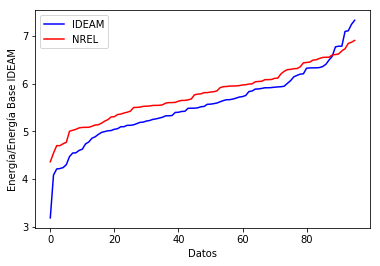

In [355]:
graph_compare(serie_obj_santamarta,serie_ref_santamarta) #Gráfica comparativa de serie IDEAM vs NREL.

In [356]:
#Se crean las series ajustadas dependiendo de su temporalidad.
santamarta_ajust_3meses = ajuste_MCP_3meses(serie_obj_santamarta, serie_ref_santamarta, 2008, 1)
santamarta_ajust_6meses = ajuste_MCP_6meses(serie_obj_santamarta, serie_ref_santamarta, 2008, 1)
santamarta_ajust_agno = ajuste_MCP_agno(serie_obj_santamarta, serie_ref_santamarta, 2008)

In [357]:
enficc(santamarta_ajust_3meses) #Se obtiene la ENFICC según el ajuste de resolución de 3 meses. 

La ENFICC 99% es:  4.0712159359


4.0712159359044957

In [358]:
enficc(santamarta_ajust_6meses) #Se obtiene la ENFICC según el ajuste de resolución de 6 meses.

La ENFICC 99% es:  4.09470735151


4.0947073515074104

In [359]:
enficc(santamarta_ajust_agno) #Se obtiene la ENFICC según el ajuste de resolución de un año.

La ENFICC 99% es:  4.20061034634


4.2006103463404036

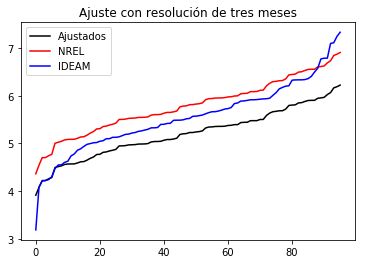

In [360]:
#Se grafica el ajuste con resolución de 3 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_santamarta, santamarta_ajust_3meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_santamarta, serie_ref_santamarta)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_santamarta, serie_obj_santamarta)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de tres meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')


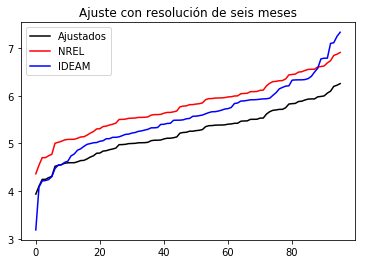

In [361]:
#Se grafica el ajuste con resolución de 6 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_santamarta, santamarta_ajust_6meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_santamarta, serie_ref_santamarta)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_santamarta, serie_obj_santamarta)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de seis meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')


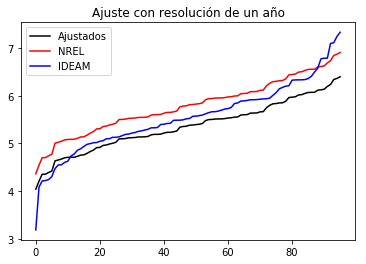

In [362]:
#Se grafica el ajuste con resolución de un año.
ghi_mensual_ajust = ghi_mensual(serie_obj_santamarta, santamarta_ajust_agno)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_santamarta, serie_ref_santamarta)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_santamarta, serie_obj_santamarta)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de un año')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')


In [363]:
calc_RMSEn(serie_obj_santamarta,serie_ref_santamarta) #Error RMS con respecto a la serie NREL.

0.085449377270846269

In [364]:
calc_RMSEn(serie_obj_santamarta,santamarta_ajust_3meses) #Error RMS con respecto al ajuste con resolución de 3 meses.

0.082496396431449834

In [365]:
calc_RMSEn(serie_obj_santamarta,santamarta_ajust_6meses) #Error RMS con respecto al ajuste con resolución de 6 meses.

0.08244122726576604

In [366]:
calc_RMSEn(serie_obj_santamarta,santamarta_ajust_agno) #Error RMS con respecto al ajuste con resolución de un año.

0.082417578148495374

In [367]:
calc_MBE(serie_obj_santamarta,santamarta_ajust_3meses) #Error MBE con respecto al ajuste con resolución de 3 meses.

0.062783754397964062

In [368]:
calc_MBE(serie_obj_santamarta,santamarta_ajust_6meses) #Error MBE con respecto al ajuste con resolución de 6 meses.

0.057825367482995452

In [369]:
calc_MBE(serie_obj_santamarta,santamarta_ajust_agno) #Error MBE con respecto al ajuste con resolución de un año.

0.035082164919957588

In [370]:
calc_KSI(serie_obj_santamarta,serie_ref_santamarta) #Error KSI con respecto a la serie NREL.

(0.027292950034223572, 4.1119524070226609e-23)

In [371]:
calc_KSI(serie_obj_santamarta,santamarta_ajust_3meses) #Error KSI con respecto al ajuste con resolución de 3 meses.

(0.03804471822952267, 1.6546392941701942e-44)

In [372]:
calc_KSI(serie_obj_santamarta,santamarta_ajust_6meses) #Error KSI con respecto al ajuste con resolución de 6 meses.

(0.036376340406114337, 1.0005066526297111e-40)

In [373]:
calc_KSI(serie_obj_santamarta,santamarta_ajust_agno) #Error KSI con respecto al ajuste con resolución de un año.

(0.029103924252795441, 3.1875423556666141e-26)

#### Santa Marta (2015)

In [374]:
#Se crean las series ajustadas dependiendo de su temporalidad.
santamarta_ajust_3meses = ajuste_MCP_3meses(serie_obj_santamarta, serie_ref_santamarta, 2015, 1)
santamarta_ajust_6meses = ajuste_MCP_6meses(serie_obj_santamarta, serie_ref_santamarta, 2015, 1)
santamarta_ajust_agno = ajuste_MCP_agno(serie_obj_santamarta, serie_ref_santamarta, 2015)

In [375]:
enficc(santamarta_ajust_3meses) #Se obtiene la ENFICC según el ajuste de resolución de 3 meses. 

La ENFICC 99% es:  4.90687552633


4.9068755263271093

In [376]:
enficc(santamarta_ajust_6meses) #Se obtiene la ENFICC según el ajuste de resolución de 6 meses.

La ENFICC 99% es:  4.99674051329


4.9967405132939113

In [377]:
enficc(santamarta_ajust_agno) #Se obtiene la ENFICC según el ajuste de resolución de un año.

La ENFICC 99% es:  4.92027323961


4.920273239608262

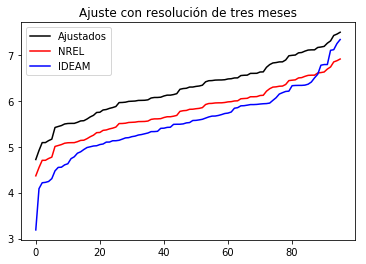

In [378]:
#Se grafica el ajuste con resolución de 3 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_santamarta, santamarta_ajust_3meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_santamarta, serie_ref_santamarta)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_santamarta, serie_obj_santamarta)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de tres meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')

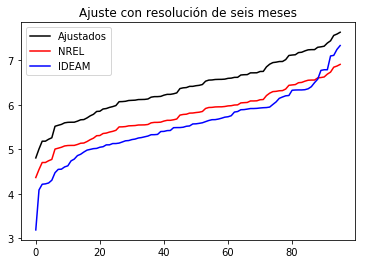

In [379]:
#Se grafica el ajuste con resolución de 6 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_santamarta, santamarta_ajust_6meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_santamarta, serie_ref_santamarta)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_santamarta, serie_obj_santamarta)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de seis meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')

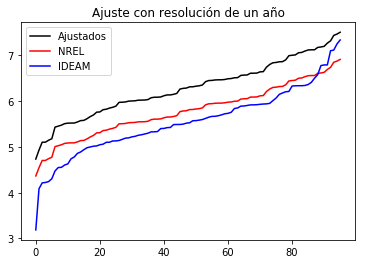

In [380]:
#Se grafica el ajuste con resolución de un año.
ghi_mensual_ajust = ghi_mensual(serie_obj_santamarta, santamarta_ajust_agno)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_santamarta, serie_ref_santamarta)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_santamarta, serie_obj_santamarta)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de un año')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')

In [381]:
calc_RMSEn(serie_obj_santamarta,serie_ref_santamarta) #Error RMS con respecto a la serie NREL.

0.085449377270846269

In [382]:
calc_RMSEn(serie_obj_santamarta,santamarta_ajust_3meses) #Error RMS con respecto al ajuste con resolución de 3 meses.

0.093678417899049349

In [383]:
calc_RMSEn(serie_obj_santamarta,santamarta_ajust_6meses) #Error RMS con respecto al ajuste con resolución de 6 meses.

0.096251943460333486

In [384]:
calc_RMSEn(serie_obj_santamarta,santamarta_ajust_agno) #Error RMS con respecto al ajuste con resolución de un año.

0.093728180812429202

In [385]:
calc_MBE(serie_obj_santamarta,serie_ref_santamarta) #Error MBE con respecto a la serie NREL.

0.041874591024665633

In [386]:
calc_MBE(serie_obj_santamarta,santamarta_ajust_3meses) #Error MBE con respecto al ajuste con resolución de 3 meses.

0.12869943952120402

In [387]:
calc_MBE(serie_obj_santamarta,santamarta_ajust_6meses) #Error MBE con respecto al ajuste con resolución de 6 meses.

0.14962474684901159

In [388]:
calc_MBE(serie_obj_santamarta,santamarta_ajust_agno) #Error MBE con respecto al ajuste con resolución de un año.

0.13083454323572924

In [389]:
calc_KSI(serie_obj_santamarta,serie_ref_santamarta) #Error KSI con respecto a la serie NREL.

(0.027292950034223572, 4.1119524070226609e-23)

In [390]:
calc_KSI(serie_obj_santamarta,santamarta_ajust_3meses) #Error KSI con respecto al ajuste con resolución de 3 meses.

(0.054799794661187569, 6.9265707751005769e-92)

In [391]:
calc_KSI(serie_obj_santamarta,santamarta_ajust_6meses) #Error KSI con respecto al ajuste con resolución de 6 meses.

(0.061387748117723039, 3.3742640054942698e-115)

In [392]:
calc_KSI(serie_obj_santamarta,santamarta_ajust_agno) #Error KSI con respecto al ajuste con resolución de un año.

(0.054999429614415916, 1.4891056624761232e-92)

- Es importante notar que, para esta región la función de ajuste parece no ayudar a relacionar los datos de NREL e IDEAM, sino que, por el contrario, la serie ajustada produce una gráfica considerablemente distinta de las series objetivo y referencia.
- Los valores calculados de la ENFICC son mucho mayores (casi por una unidad) en el 2015 que en el 2008. Esto indica una variación de los niveles de radiación que puede explicarse con la presencia del fenómeno del Niño.
- Los errores RMS aumentan ligeramente en el año que se presenta el Niño. Además, los errores MBE presentan aumentos de casi 10% en el 2015.

En conclusión, el fenómeno del Niño parece tener una influencia sobre los niveles de radiación solar, aunque para confirmar sería preciso realizar un análisis con otras regiones en las cuales el ajuste ayude a arreglar la gráfica NREL.

A continuación, realizamos el análisis del fenómeno de la niña en la región de Sucre. Para esto, se toma como referencia el año 2006 y el año 2010 (cuando sucedió el fenómeno de la niña):

#### Sucre (2006)

In [393]:
enficc(serie_obj_sucre) #Se obtiene la ENFICC según la serie IDEAM.

La ENFICC 99% es:  2.37964439946


2.3796443994605623

In [394]:
enficc(serie_ref_sucre) #Se obtiene la ENFICC según la serie NREL.

La ENFICC 99% es:  4.8399985


4.8399984999999992

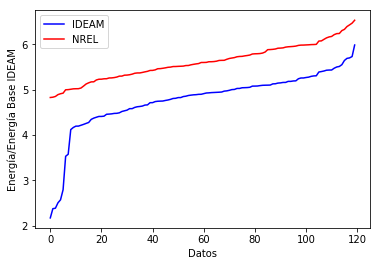

In [395]:
graph_compare(serie_obj_sucre,serie_ref_sucre) #Gráfica comparativa de serie IDEAM vs NREL.

In [396]:
#Se crean las series ajustadas dependiendo de su temporalidad.
sucre_ajust_3meses = ajuste_MCP_3meses(serie_obj_sucre, serie_ref_sucre, 2006, 1)
sucre_ajust_6meses = ajuste_MCP_6meses(serie_obj_sucre, serie_ref_sucre, 2006, 1)
sucre_ajust_agno = ajuste_MCP_agno(serie_obj_sucre, serie_ref_sucre, 2006)

In [397]:
enficc(sucre_ajust_3meses) #Se obtiene la ENFICC según el ajuste de resolución de 3 meses. 

La ENFICC 99% es:  4.27838638604


4.2783863860427562

In [398]:
enficc(sucre_ajust_6meses) #Se obtiene la ENFICC según el ajuste de resolución de 6 meses.

La ENFICC 99% es:  4.36625620247


4.3662562024734495

In [399]:
enficc(sucre_ajust_agno) #Se obtiene la ENFICC según el ajuste de resolución de un año.

La ENFICC 99% es:  4.39233206155


4.3923320615547405

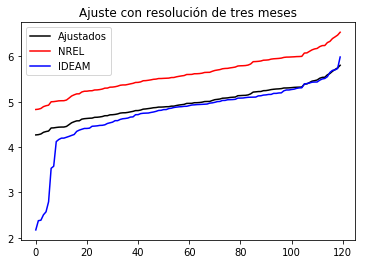

In [400]:
#Se grafica el ajuste con resolución de 3 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_sucre, sucre_ajust_3meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_sucre, serie_ref_sucre)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_sucre, serie_obj_sucre)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de tres meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')


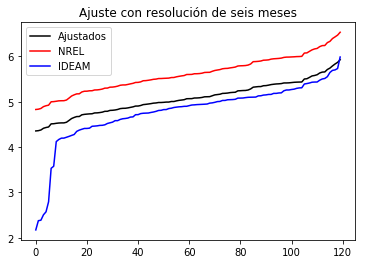

In [401]:
#Se grafica el ajuste con resolución de 6 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_sucre, sucre_ajust_6meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_sucre, serie_ref_sucre)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_sucre, serie_obj_sucre)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de seis meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')


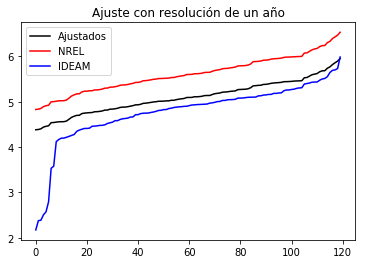

In [402]:
#Se grafica el ajuste con resolución de un año.
ghi_mensual_ajust = ghi_mensual(serie_obj_sucre, sucre_ajust_agno)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_sucre, serie_ref_sucre)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_sucre, serie_obj_sucre)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de un año')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')

In [403]:
calc_RMSEn(serie_obj_sucre,serie_ref_sucre) #Error RMS con respecto a la serie NREL.

0.12001598949829785

In [404]:
calc_RMSEn(serie_obj_sucre,sucre_ajust_3meses) #Error RMS con respecto al ajuste con resolución de 3 meses.

0.10745357470062816

In [405]:
calc_RMSEn(serie_obj_sucre,sucre_ajust_6meses) #Error RMS con respecto al ajuste con resolución de 6 meses.

0.10902868375429008

In [406]:
calc_RMSEn(serie_obj_sucre,sucre_ajust_agno) #Error RMS con respecto al ajuste con resolución de un año.

0.10929920192300911

In [407]:
calc_MBE(serie_obj_sucre,serie_ref_sucre) #Error MBE con respecto a la serie NREL.

0.17384141999352437

In [408]:
calc_MBE(serie_obj_sucre,sucre_ajust_3meses) #Error MBE con respecto al ajuste con resolución de 3 meses.

0.040208655471956282

In [409]:
calc_MBE(serie_obj_sucre,sucre_ajust_6meses) #Error MBE con respecto al ajuste con resolución de 6 meses.

0.06188156130216791

In [410]:
calc_MBE(serie_obj_sucre,sucre_ajust_agno) #Error MBE con respecto al ajuste con resolución de un año.

0.067550465214598635

In [411]:
calc_KSI(serie_obj_sucre,serie_ref_sucre) #Error KSI con respecto a la serie NREL.

(0.065067086527936163, 1.3934081933996356e-161)

In [412]:
calc_KSI(serie_obj_sucre,sucre_ajust_3meses) #Error KSI con respecto al ajuste con resolución de 3 meses.

(0.035197608616282634, 1.3910014704393458e-47)

In [413]:
calc_KSI(serie_obj_sucre,sucre_ajust_6meses) #Error KSI con respecto al ajuste con resolución de 6 meses.

(0.037342552026286752, 1.6619378935089402e-53)

In [414]:
calc_KSI(serie_obj_sucre,sucre_ajust_agno) #Error KSI con respecto al ajuste con resolución de un año.

(0.038608981380065799, 3.6244570257137499e-57)

#### Sucre (2010)

In [415]:
#Se crean las series ajustadas dependiendo de su temporalidad.
sucre_ajust_3meses = ajuste_MCP_3meses(serie_obj_sucre, serie_ref_sucre, 2010, 1)
sucre_ajust_6meses = ajuste_MCP_6meses(serie_obj_sucre, serie_ref_sucre, 2010, 1)
sucre_ajust_agno = ajuste_MCP_agno(serie_obj_sucre, serie_ref_sucre, 2010)


In [416]:
enficc(sucre_ajust_3meses) #Se obtiene la ENFICC según el ajuste de resolución de 3 meses. 

La ENFICC 99% es:  4.32921794698


4.3292179469843761

In [417]:
enficc(sucre_ajust_6meses) #Se obtiene la ENFICC según el ajuste de resolución de 6 meses.

La ENFICC 99% es:  4.40342865965


4.403428659649693

In [418]:
enficc(sucre_ajust_agno) #Se obtiene la ENFICC según el ajuste de resolución de un año.

La ENFICC 99% es:  4.3517498397


4.3517498396978223

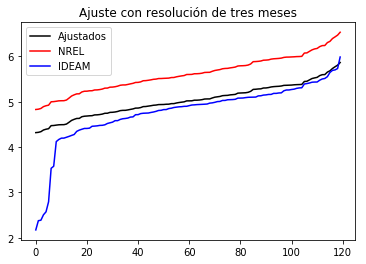

In [419]:
#Se grafica el ajuste con resolución de 3 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_sucre, sucre_ajust_3meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_sucre, serie_ref_sucre)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_sucre, serie_obj_sucre)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de tres meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')


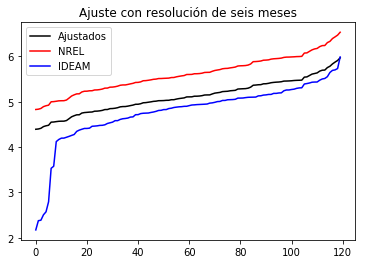

In [420]:
#Se grafica el ajuste con resolución de 6 meses.
ghi_mensual_ajust = ghi_mensual(serie_obj_sucre, sucre_ajust_6meses)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_sucre, serie_ref_sucre)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_sucre, serie_obj_sucre)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de seis meses')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')


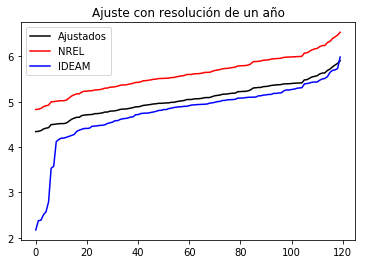

In [421]:
#Se grafica el ajuste con resolución de un año.
ghi_mensual_ajust = ghi_mensual(serie_obj_sucre, sucre_ajust_agno)
ghi_diario_ajust = ghi_dia(ghi_mensual_ajust)
datos_ajustados = sorted(ghi_diario_ajust['PromedioDia'])

ghi_mensual_NREL = ghi_mensual(serie_obj_sucre, serie_ref_sucre)
ghi_diario_NREL = ghi_dia(ghi_mensual_NREL)
datos_NREL = sorted(ghi_diario_NREL['PromedioDia'])

ghi_mensual_IDEAM = ghi_mensual(serie_obj_sucre, serie_obj_sucre)
ghi_diario_IDEAM = ghi_dia(ghi_mensual_IDEAM)
datos_IDEAM = sorted(ghi_diario_IDEAM['PromedioDia'])

numdatos_ajustados = range(len(datos_ajustados))
numdatos_NREL = range(len(datos_NREL))
numdatos_IDEAM = range(len(datos_IDEAM))

pylab.title('Ajuste con resolución de un año')
pylab.plot(numdatos_ajustados,datos_ajustados,'-k', label='Ajustados')
pylab.plot(numdatos_NREL,datos_NREL,'-r', label='NREL')
pylab.plot(numdatos_IDEAM,datos_IDEAM,'-b', label='IDEAM')
pylab.legend(loc='upper left')


In [422]:
calc_RMSEn(serie_obj_sucre,serie_ref_sucre) #Error RMS con respecto a la serie NREL.

0.12001598949829785

In [423]:
calc_RMSEn(serie_obj_sucre,sucre_ajust_3meses) #Error RMS con respecto al ajuste con resolución de 3 meses.

0.10804336098186705

In [424]:
calc_RMSEn(serie_obj_sucre,sucre_ajust_6meses) #Error RMS con respecto al ajuste con resolución de 6 meses.

0.10949449176289046

In [425]:
calc_RMSEn(serie_obj_sucre,sucre_ajust_agno) #Error RMS con respecto al ajuste con resolución de un año.

0.10866879542125969

In [426]:
calc_MBE(serie_obj_sucre,serie_ref_sucre) #Error MBE con respecto a la serie NREL.

0.17384141999352437

In [427]:
calc_MBE(serie_obj_sucre,sucre_ajust_3meses) #Error MBE con respecto al ajuste con resolución de 3 meses.

0.051840960649480683

In [428]:
calc_MBE(serie_obj_sucre,sucre_ajust_6meses) #Error MBE con respecto al ajuste con resolución de 6 meses.

0.070187568967753203

In [429]:
calc_MBE(serie_obj_sucre,sucre_ajust_agno) #Error MBE con respecto al ajuste con resolución de un año.

0.058059067058790728

In [430]:
calc_KSI(serie_obj_sucre,serie_ref_sucre) #Error KSI con respecto a la serie NREL.

(0.065067086527936163, 1.3934081933996356e-161)

In [431]:
calc_KSI(serie_obj_sucre,sucre_ajust_3meses) #Error KSI con respecto al ajuste con resolución de 3 meses.

(0.034444596568089653, 1.3788355329217402e-45)

In [432]:
calc_KSI(serie_obj_sucre,sucre_ajust_6meses) #Error KSI con respecto al ajuste con resolución de 6 meses.

(0.039225082146769119, 5.4185879008916727e-59)

In [433]:
calc_KSI(serie_obj_sucre,sucre_ajust_agno) #Error KSI con respecto al ajuste con resolución de un año.

(0.036372763782401896, 8.7461708282754077e-51)

- Al contrario del ejemplo pasado, en el cual podíamos ver que el fenómeno del Niño cambiaba los valores obtenidos significativamente, en este caso no vemos mayores cambios entre los periodos de tiempo. 
- Esto nos indica dos posibilidades: el fenómeno de la Niña no parece tener una incidencia sobre el nivel de radiación, o el fenómeno del Niño no tiene incidencia sobre el nivel de radiación, y los cambios en los valores vistos en el ejemplo anterior se deben a que la gráfica MCP no ajusta bien los datos satelitales.